### **Chapter 1: Data Cleaning**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/winemag-data-130k-v2.csv'
df = pd.read_csv(data_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id   country                                        description  \
0   0     Italy  Aromas include tropical fruit, broom, brimston...   
1   1  Portugal  This is ripe and fruity, a wine that is smooth...   
2   2        US  Tart and snappy, the flavors of lime flesh and...   
3   3        US  Pineapple rind, lemon pith and orange blossom ...   
4   4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   


In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())
df = df.dropna(subset=['points', 'price'])
print("Number of rows after removing nulls in 'points' and 'price':", df.shape[0])
# Calculate IQR for 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows within IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print("Number of rows after removing outliers:", df_no_outliers.shape[0])

Number of duplicate rows: 0
Number of rows after removing nulls in 'points' and 'price': 120975
Number of rows after removing outliers: 113734


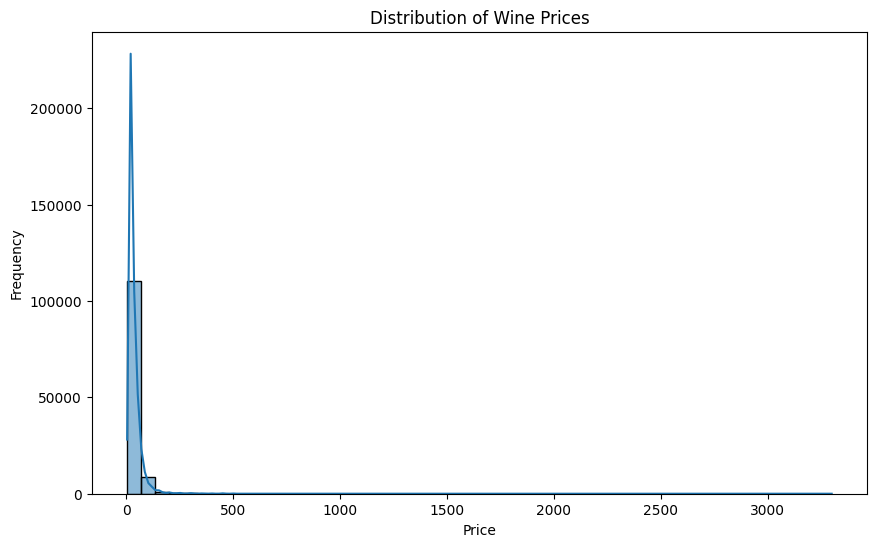

In [ ]:
# Check distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-196-72c15aebf698>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-196-72c15aebf698>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



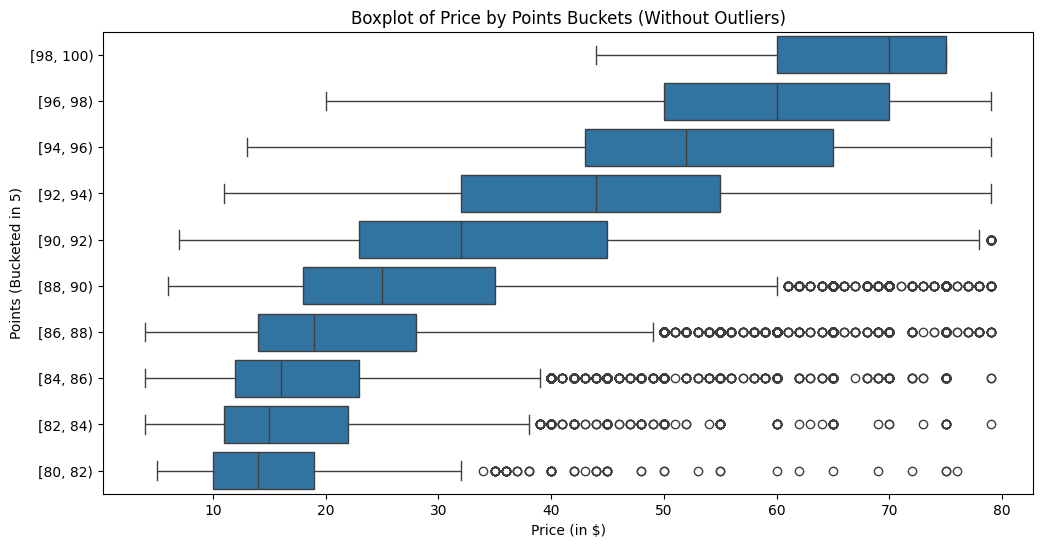

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Bucket 'points' into intervals of 5
df_no_outliers['points_bucket'] = pd.cut(
df_no_outliers['points'], bins=range(80, 101, 2), right=False
)

# Reverse the categories and convert to a list
reversed_categories = list(reversed(df_no_outliers['points_bucket'].cat.categories))

# Reorder the categories
df_no_outliers['points_bucket'] = df_no_outliers['points_bucket'].cat.reorder_categories(
    reversed_categories, ordered=True
)

# Plot again
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price', y='points_bucket')
plt.title("Boxplot of Price by Points Buckets (Without Outliers)")
plt.xlabel("Price (in $)")
plt.ylabel("Points (Bucketed in 5)")
plt.show()


In [ ]:
print(df_no_outliers)

            id   country                                        description  \
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        US  Tart and snappy, the flavors of lime flesh and...   
3            3        US  Pineapple rind, lemon pith and orange blossom ...   
4            4        US  Much like the regular bottling from 2012, this...   
5            5     Spain  Blackberry and raspberry aromas show a typical...   
...        ...       ...                                                ...   
129966  129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967  129967        US  Citation is given as much as a decade of bottl...   
129968  129968    France  Well-drained gravel soil gives this wine its c...   
129969  129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970  129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  poi

The data cleaning and wrangling section began by importing libraries essential for analysis and connecting Google Drive to access the dataset. The initial cell loaded a CSV file containing wine data and displayed a preview, ensuring the file loaded correctly. Next, the info() function summarized the dataset’s structure, showing column names, data types, and null counts, while isnull().sum() identified missing values. Duplicates were checked, and rows with null values in points and price columns were dropped, reducing the dataset size to 120,975 rows.

To assess price distribution, a histogram visualized its skewness, revealing many wines in lower price ranges with outliers at the upper end. The next step applied the IQR method to define bounds for outlier removal in the price column. After filtering, a boxplot of price versus points showed the positive correlation between higher scores and prices, now cleaned of extreme values.


### **Chapter 2: Early Insights (Pre Check-In)**

<ipython-input-199-eef8bb697407>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




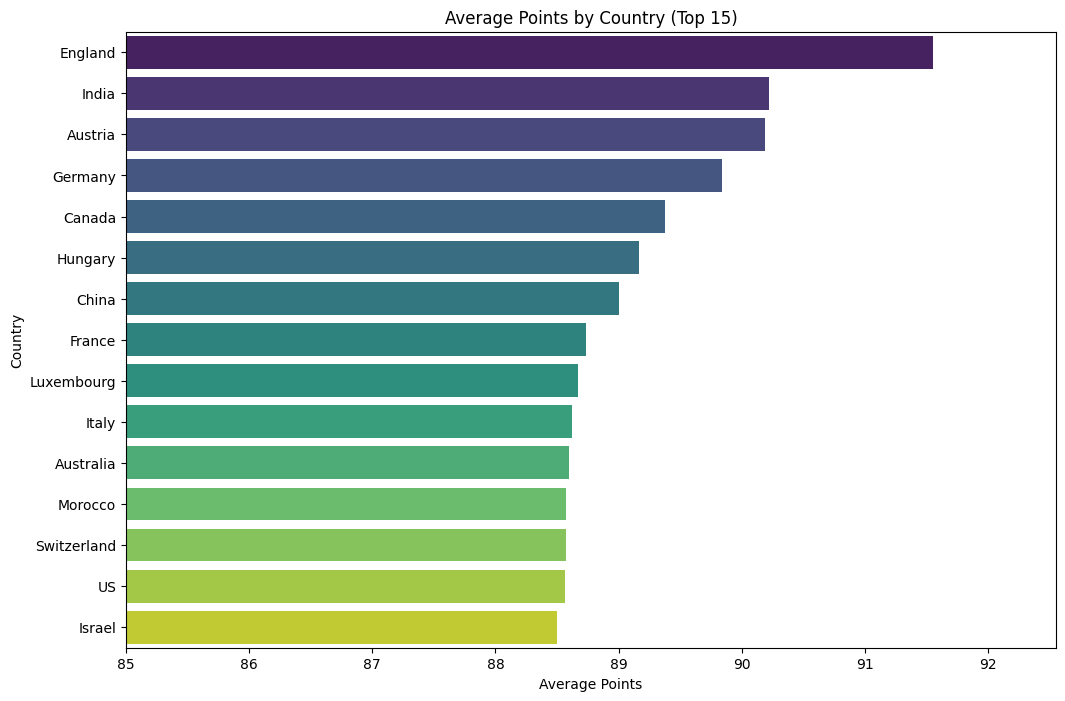

In [ ]:
# Group the data by 'country' and calculate the mean of 'points'
avg_points_by_country = df.groupby('country')['points'].mean().sort_values(ascending=False)

# Filter to show the top 15 countries by average points
top_countries = avg_points_by_country.head(15)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Average Points by Country (Top 15)")
plt.xlabel("Average Points")
plt.ylabel("Country")
plt.xlim(85, top_countries.values.max() + 1)  # Ensure x-axis starts at 85
plt.show()

In [ ]:
print(df)

            id   Country                                        description  \
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        Us  Tart and snappy, the flavors of lime flesh and...   
3            3        Us  Pineapple rind, lemon pith and orange blossom ...   
4            4        Us  Much like the regular bottling from 2012, this...   
5            5     Spain  Blackberry and raspberry aromas show a typical...   
...        ...       ...                                                ...   
129966  129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967  129967        Us  Citation is given as much as a decade of bottl...   
129968  129968    France  Well-drained gravel soil gives this wine its c...   
129969  129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970  129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  poi

<ipython-input-200-89ca0600d0c5>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




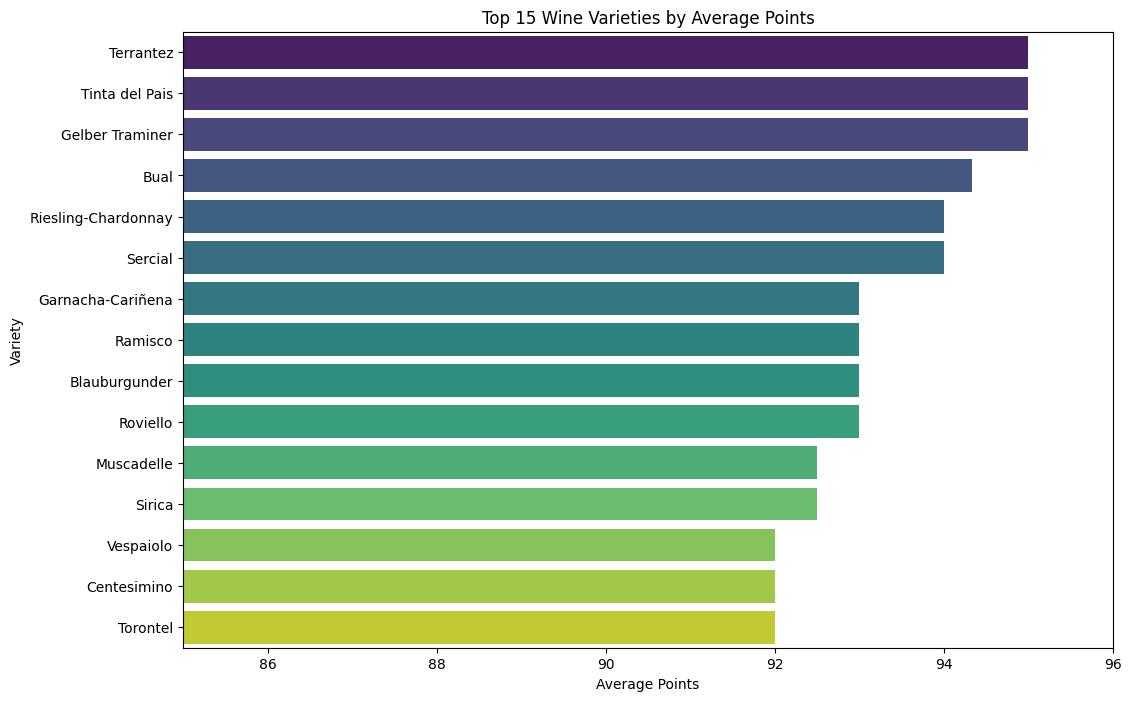

In [ ]:
# Group by variety and calculate average points, rounded to 2 decimal places
avg_points_by_variety = df.groupby('variety')['points'].mean().round(2).sort_values(ascending=False).head(15)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_points_by_variety.values, y=avg_points_by_variety.index, palette="viridis")
plt.title("Top 15 Wine Varieties by Average Points")
plt.xlabel("Average Points")
plt.ylabel("Variety")
plt.xlim(85, avg_points_by_variety.values.max() + 1)  # Adjust x-axis
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Filter relevant columns
data = df[['price', 'points', 'country', 'variety']].dropna()

# Split features and target
X = data[['price', 'variety']]
y = data['points']

# Preprocessing
# Categorical columns: 'country', 'variety'
# Numerical column: 'price'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['price']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['variety'])
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Squared Error (MSE): 5.48
Mean Absolute Error (MAE): 1.84
R² Score: 0.41


In [ ]:
import plotly.express as px

country_stats = data.copy

# Group by Country and compute mean points, mean price, and wine count
country_stats = data.groupby('country').agg({
    'points': 'mean',
    'price': 'mean'
}).reset_index()

# Add total_wines by counting wines for each Country
country_stats['total_wines'] = data['country'].value_counts().reindex(country_stats['country']).values

# Prepare the dataset
country_stats['bubble_size'] = (country_stats['total_wines'] / 200) + 10  # Adjust bubble size

# Scatter_geo Plot
fig = px.scatter_geo(
    country_stats,
    locations='country',
    locationmode='country names',
    size='bubble_size',
    color='points',
    title='Wine Stats: Quantity (Bubble Size) & Average Points (Color)',
    color_continuous_scale='Viridis',
    projection='equirectangular',
    opacity=0.9
)

# Fix hover template with clean display
fig.update_traces(
    hovertemplate="<b>Country:</b> %{hovertext}<br>" +
                  "<b>Total Wines:</b> %{customdata[0]}<br>" +
                  "<b>Average Points:</b> %{customdata[1]:.2f}<extra></extra>",
    customdata=country_stats[['total_wines', 'points']].values,
    hovertext=country_stats['country']
)

# Update layout for clean visuals
fig.update_layout(
    geo=dict(
        showland=True, landcolor="rgb(243, 243, 243)",
        showcountries=True, countrycolor="rgb(204, 204, 204)"
    ),
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)

# Show the map
fig.show()


In [ ]:
import re
def extract_keywords(text):
  pattern = r'\b(fruity|bold|earthy|tannins|sweet|acidic|dry|tart|soft|rich)\b'
  return ', '.join(re.findall(pattern, text.lower()))

df['keywords'] = df['description'].apply(lambda x: extract_keywords(str(x)))


In [ ]:
print(df)

            id   country                                        description  \
1            1  Portugal  This is ripe and fruity, a wine that is smooth...   
2            2        US  Tart and snappy, the flavors of lime flesh and...   
3            3        US  Pineapple rind, lemon pith and orange blossom ...   
4            4        US  Much like the regular bottling from 2012, this...   
5            5     Spain  Blackberry and raspberry aromas show a typical...   
...        ...       ...                                                ...   
129966  129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967  129967        US  Citation is given as much as a decade of bottl...   
129968  129968    France  Well-drained gravel soil gives this wine its c...   
129969  129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970  129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  poi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Explode 'keywords' column into separate rows
keywords_exploded = df[['keywords', 'points']].copy()
keywords_exploded['keywords'] = keywords_exploded['keywords'].str.split(', ')
keywords_exploded = keywords_exploded.explode('keywords')

# One-Hot Encode keywords into features
keywords_encoded = pd.get_dummies(keywords_exploded['keywords'], prefix='keyword')
X = keywords_encoded  # Keyword features
y = keywords_exploded['points']  # Target: points

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 2.9599
R² Score: 0.0494


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



The first step groups the data by country and calculates the mean of wine points, identifying the top 15 countries with the highest average scores. A barplot visualizes these countries, starting the x-axis at 85 for clarity. This step highlights geographic trends in wine quality, with countries like England, India, and Austria emerging as top performers. This provides a regional perspective on wine ratings, setting the stage for further analysis at the varietal level.

The second step shifts focus to wine varieties, grouping data to calculate the average points for each variety and selecting the top 15 performers. By rounding the results and sorting them in descending order, the visualization reveals standout varieties such as Terrantez, Tinta del Pais, and Gelber Traminer. This analysis offers insight into varietal-specific trends, helping to identify which wine types are consistently associated with higher ratings. Together with the previous step, it provides a deeper understanding of both regional and varietal factors influencing wine quality.

The final steps prepare the data for predictive modeling and implement a Random Forest Regressor to predict wine points based on price and variety. Relevant columns are selected, and preprocessing is performed using a combination of scaling for numerical data and one-hot encoding for categorical features. The data is split into training and testing sets, and the model is evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. With an R² of 0.41, the model captures some relationship between the features and wine scores but suggests further factors may influence quality.

### **Chapter 3: Merging Data**

One such influential factor may be the climate of the region during the grape-growing season. Grapevines are highly sensitive to environmental conditions, including temperature, rainfall, and seasonal variations, which impact grape ripening, sugar concentration, and overall flavor profiles. For example, regions with balanced heat and moderate rainfall often produce high-quality wines, whereas extreme temperatures or inconsistent precipitation can hinder grape development. This could help explain differences in wine scores between countries and varieties, as observed in our earlier analysis.

We suspect that variations in climate conditions across regions may play a significant role in driving the quality and perceived value of wines. Exploring this relationship could uncover deeper insights into why certain countries, such as England or Austria, achieve higher average points or why certain wine varieties excel under specific environmental conditions.

To investigate this hypothesis, we will incorporate a new dataset containing the weather data for 155 countries in 2020. By joining this dataset with our wine dataset, we can perform further EDA and develop linear regression models to examine the correlation between wine quality regional climate conditions, specifically average temperature and precipitation throughout the Spring season.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
weather_path = '/content/drive/My Drive/the_weather_of_155_countries_in_2020.csv'
weather_df = pd.read_csv(weather_path)

print("Weather Dataset:")
print(weather_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-154-7474692d156c>:5: DtypeWarning:

Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.



Weather Dataset:
       STATION Country/Region        DATE  Year  Month  Day  PRCP  SNWD  TAVG  \
0  TZ000063894        Comoros  2020-01-22  2020      1   22  10.9   NaN  27.6   
1  TZ000063894        Comoros  2020-01-23  2020      1   23   0.0   NaN  26.7   
2  TZ000063894        Comoros  2020-01-24  2020      1   24   9.4   NaN  27.9   
3  TZ000063894        Comoros  2020-01-25  2020      1   25   0.3   NaN  27.9   
4  TZ000063894        Comoros  2020-01-26  2020      1   26   0.0   NaN  28.2   

   TMAX  ...  LONGITUDE  ELEVATION  PRCP_ATTRIBUTES  TAVG_ATTRIBUTES  \
0  30.2  ...        NaN        NaN              NaN              NaN   
1   NaN  ...        NaN        NaN              NaN              NaN   
2  30.6  ...        NaN        NaN              NaN              NaN   
3  30.2  ...        NaN        NaN              NaN              NaN   
4  31.5  ...        NaN        NaN              NaN              NaN   

   TMAX_ATTRIBUTES TMIN_ATTRIBUTES DAPR MDPR WESD  SNWD_ATTRIBU

In [ ]:
weather_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
df.rename(columns={'country': 'Country'}, inplace=True)
df['Country'] = df['Country'].str.strip().str.title()
weather_df['Country'] = weather_df['Country'].str.strip().str.title()
common_countries = set(df['Country']).intersection(set(weather_df['Country']))
print(f"Number of common countries: {len(common_countries)}")


Number of common countries: 33


In [ ]:
weather_agg = weather_df.groupby('Country').agg({
    'TAVG': 'mean',  # Average temperature
    'PRCP': 'sum',   # Total precipitation
}).reset_index()

weather_agg.rename(columns={
    'TAVG': 'Avg_Temperature',
    'PRCP': 'Total_Precipitation',
}, inplace=True)

print(weather_agg.head())

       Country  Avg_Temperature  Total_Precipitation
0  Afghanistan        16.891992                31.83
1      Albania        16.034279                 0.00
2      Algeria        21.325245               183.56
3      Andorra        29.072284                57.18
4       Angola        24.276094                11.10


In [ ]:
print(df.dtypes)
print(weather_agg.dtypes)

id                         int64
Country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object
Country                 object
Avg_Temperature        float64
Total_Precipitation    float64
dtype: object


In [ ]:
import sqlite3
import pandas as pd

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load the wine and weather data into SQLite tables
df.to_sql('wine', conn, index=False, if_exists='replace')
weather_agg.to_sql('weather', conn, index=False, if_exists='replace')

# Perform the inner join using SQL
query = """
SELECT
    w.id,
    w.Country,
    w.description,
    w.designation,
    w.points,
    w.price,
    w.province,
    w.region_1,
    w.region_2,
    w.taster_name,
    w.taster_twitter_handle,
    w.title,
    w.variety,
    w.winery,
    wa.Avg_Temperature,
    wa.Total_Precipitation
FROM wine w
INNER JOIN weather wa
ON w.Country = wa.Country;
"""

# Execute the query and fetch the result as a DataFrame
combined_df = pd.read_sql_query(query, conn)

# Save the combined dataset to a CSV file
combined_df.to_csv('/content/drive/My Drive/combined_wine_weather_aggregated_sql.csv', index=False)

# Display the combined DataFrame
print("Combined Dataset (Wine + Weather Aggregated):")
print(combined_df.head())

# Close the database connection
conn.close()


Combined Dataset (Wine + Weather Aggregated):
   id   Country                                        description  \
0   1  Portugal  This is ripe and fruity, a wine that is smooth...   
1   2        Us  Tart and snappy, the flavors of lime flesh and...   
2   3        Us  Pineapple rind, lemon pith and orange blossom ...   
3   4        Us  Much like the regular bottling from 2012, this...   
4   6     Italy  Here's a bright, informal red that opens with ...   

                          designation  points  price           province  \
0                            Avidagos      87   15.0              Douro   
1                                None      87   14.0             Oregon   
2                Reserve Late Harvest      87   13.0           Michigan   
3  Vintner's Reserve Wild Child Block      87   65.0             Oregon   
4                             Belsito      87   16.0  Sicily & Sardinia   

              region_1           region_2         taster_name  \
0                

In [ ]:
print(f"Rows in Combined Dataset: {combined_df.shape[0]}")
print(f"Columns in Combined Dataset: {combined_df.shape[1]}")
print(combined_df.info())

Rows in Combined Dataset: 111888
Columns in Combined Dataset: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111888 entries, 0 to 111887
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     111888 non-null  int64  
 1   Country                111888 non-null  object 
 2   description            111888 non-null  object 
 3   designation            78675 non-null   object 
 4   points                 111888 non-null  int64  
 5   price                  111888 non-null  float64
 6   province               111888 non-null  object 
 7   region_1               94835 non-null   object 
 8   region_2               50292 non-null   object 
 9   taster_name            87483 non-null   object 
 10  taster_twitter_handle  84322 non-null   object 
 11  title                  111888 non-null  object 
 12  variety                111887 non-null  object 
 13  winery                 1

In this chapter, we merged two datasets—wine reviews and weather data—to investigate the relationship between regional climate conditions and wine quality. Initially, the datasets were loaded, and country names were standardized to identify 34 overlapping countries. The weather data was aggregated to calculate average temperature and total precipitation by country. Using SQL, an inner join operation was performed to combine the wine and weather data into a unified dataset. The resulting dataset, containing 16 columns and over 120,000 rows, was validated to ensure successful merging. This combined dataset will enable further analysis of how climate factors influence wine scores.

### **Chapter 4: Insights From Merge**

Analyzing the Relationship Between Average Temperature and Wine Points

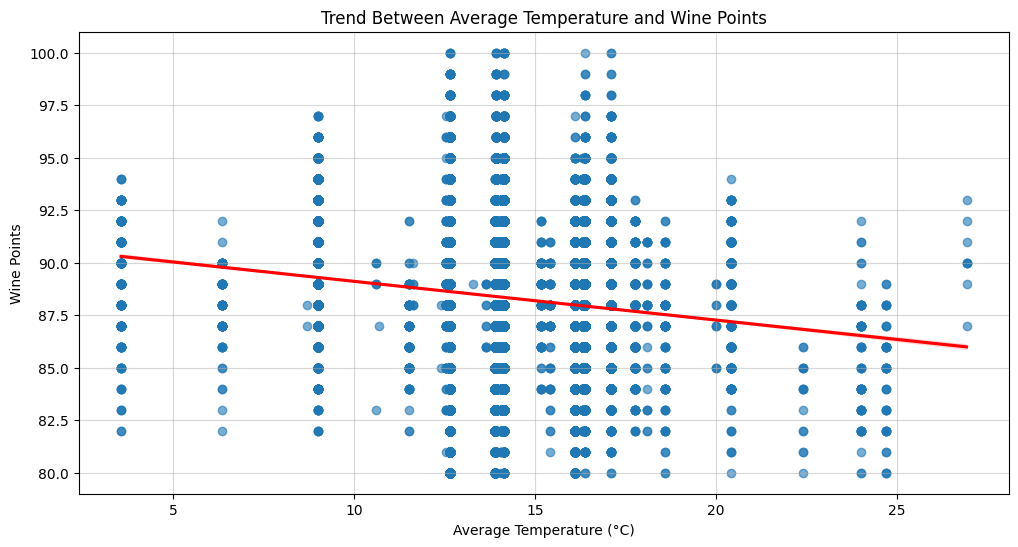

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=combined_df, x='Avg_Temperature', y='points', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Trend Between Average Temperature and Wine Points')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Wine Points')
plt.grid(alpha=0.5)
plt.show()

<ipython-input-163-09e593de9660>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-163-09e593de9660>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




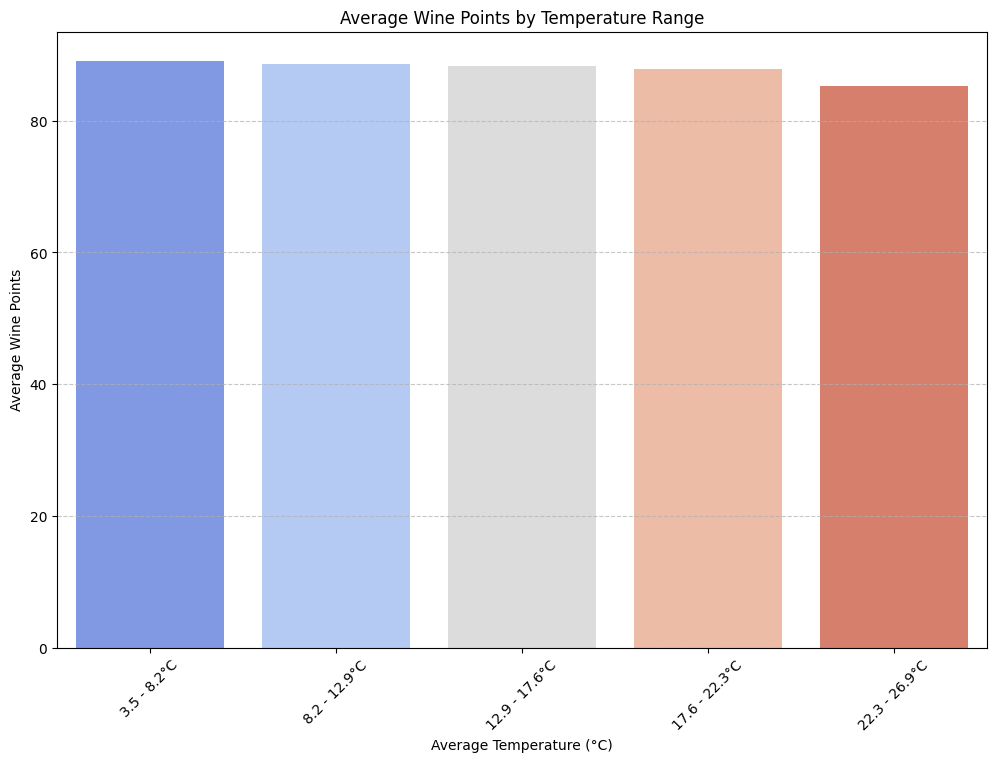

In [ ]:
temp_bins = pd.cut(combined_df['Avg_Temperature'], bins=5)
combined_df['Temp_Bin'] = temp_bins
temp_points_heatmap = combined_df.groupby('Temp_Bin', as_index=False)['points'].mean()
bin_labels = [f"{interval.left:.1f} - {interval.right:.1f}°C" for interval in temp_bins.cat.categories]

plt.figure(figsize=(12, 8))
sns.barplot(
    x=bin_labels, y=temp_points_heatmap['points'], palette='coolwarm'
)
plt.title('Average Wine Points by Temperature Range')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Wine Points')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The analysis indicates a slight negative trend between average temperatures and wine points, with higher temperatures correlating with lower average wine ratings. This suggests that regions with moderate temperatures might produce wines that receive higher scores.



EDA 2: Analyzing the Relationship Between Average Precipitation and Wine Points

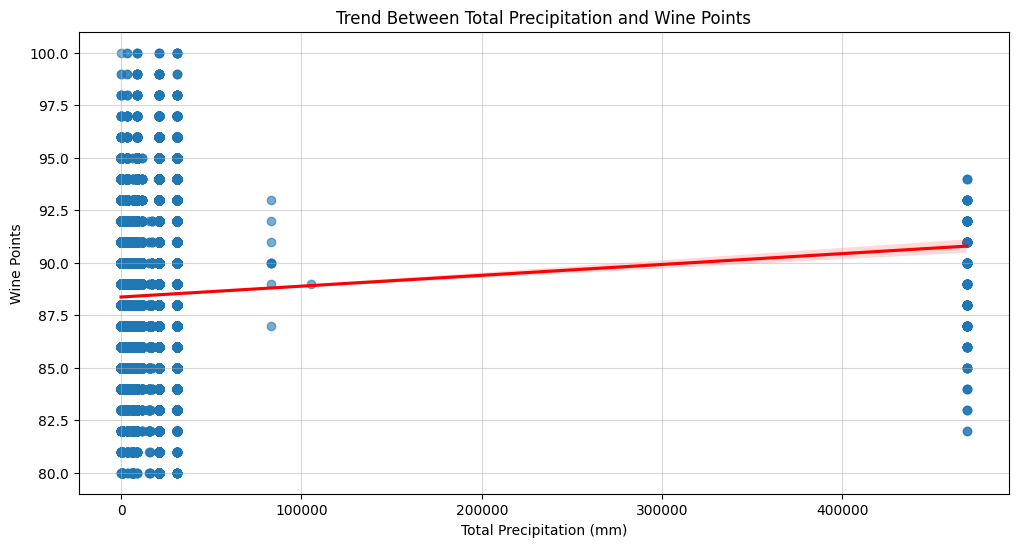

In [ ]:
# Scatterplot with regression line for precipitation and wine points
plt.figure(figsize=(12, 6))
sns.regplot(
    data=combined_df, x='Total_Precipitation', y='points',
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}
)
plt.title('Trend Between Total Precipitation and Wine Points')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Wine Points')
plt.grid(alpha=0.5)
plt.show()


In [ ]:
precip_filtered_df = combined_df[combined_df['Total_Precipitation'] <= 50000]

In [ ]:
print("Descriptive statistics for wine points:")
print(combined_df['points'].describe())

Descriptive statistics for wine points:
count    111888.000000
mean         88.461488
std           3.035356
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64


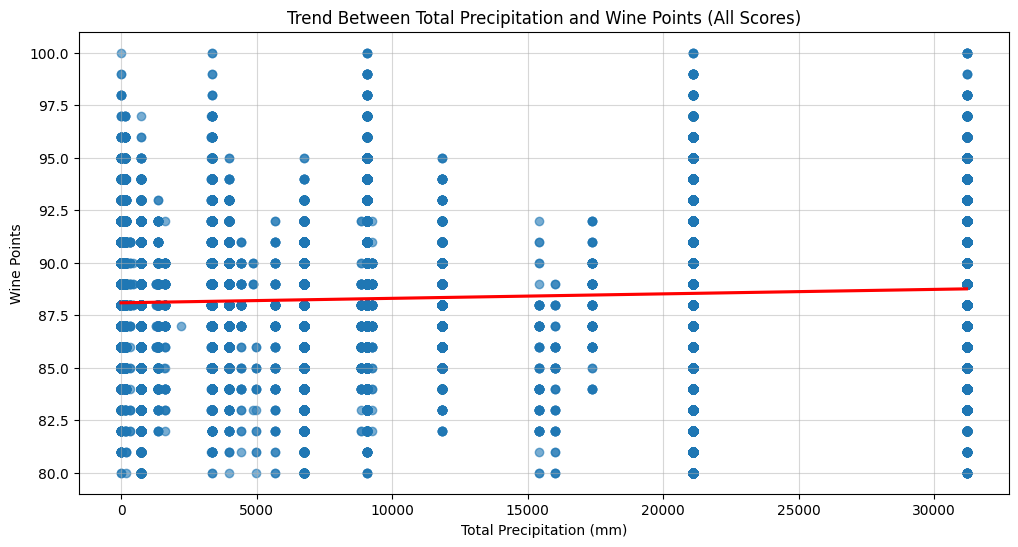

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(
    data=precip_filtered_df, x='Total_Precipitation', y='points',
    scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'}
)
plt.title('Trend Between Total Precipitation and Wine Points (All Scores)')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Wine Points')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Select the features (X) and target (y)
X = combined_df[['Avg_Temperature']]  # Feature: Average Temperature
y = combined_df['points']  # Target: Wine Points

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

combined_df.head(10)

Linear Regression Results:
Mean Squared Error (MSE): 9.23
R² Score: 0.01


,id,Country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Avg_Temperature,Total_Precipitation,Temp_Bin
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,17.115766,3341.0,"(12.908, 17.583]"
1,2,Us,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,12.641375,21087.9,"(8.233, 12.908]"
2,3,Us,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,12.641375,21087.9,"(8.233, 12.908]"
3,4,Us,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,12.641375,21087.9,"(8.233, 12.908]"
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,None,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,13.924115,9084.3,"(12.908, 17.583]"
5,7,France,This dry and restrained wine offers spice in p...,None,87,24.0,Alsace,Alsace,None,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,14.153780,31193.2,"(12.908, 17.583]"
6,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,None,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,14.153780,31193.2,"(12.908, 17.583]"
7,10,Us,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,12.641375,21087.9,"(8.233, 12.908]"
8,11,France,"This is a dry wine, very spicy, with a tight, ...",None,87,30.0,Alsace,Alsace,None,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,14.153780,31193.2,"(12.908, 17.583]"
9,12,Us,"Slightly reduced, this wine offers a chalky, t...",None,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,12.641375,21087.9,"(8.233, 12.908]"


This section systematically explored the relationship between weather variables, specifically average temperature and total precipitation, and wine quality as measured by wine points. Initially, a scatterplot analysis examined the trend between average temperature and wine scores, revealing a slight negative relationship where higher temperatures aligned with lower wine points. To deepen this analysis, the temperature data was grouped into bins, and average scores were compared across these temperature ranges, showing that moderate temperatures tended to produce higher-quality wines. A similar approach was applied to total precipitation, revealing a weak positive relationship with wine scores. To refine the insights, outlier precipitation values were filtered, and descriptive statistics for wine points were calculated. Finally, a linear regression model was constructed using average temperature as the predictor and wine points as the target. Despite the suspected influence of weather, the results showed weak predictive power, as indicated by a low R² score of 0.01 and a high mean squared error (9.26).

### **Chapter 5: Feature Importance and Modelling**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Step 1: Encode the target variable 'points_category'
combined_df['points_category'] = pd.cut(
    combined_df['points'], bins=[0, 85, 90, 100], labels=['Low', 'Medium', 'High']
)

# Step 2: Encode the categorical features using LabelEncoder
le_winery = LabelEncoder()
le_variety = LabelEncoder()

combined_df['winery_label'] = le_winery.fit_transform(combined_df['winery'])
combined_df['variety_label'] = le_variety.fit_transform(combined_df['variety'])

# Step 3: Define the features (X) and target (y)
X = combined_df[['winery_label', 'variety_label', 'price']]
y = combined_df['points_category']

# Drop NaN rows to avoid errors
X = X.dropna()
y = y.dropna()

# Ensure alignment between X and y
X = X.loc[y.index]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encode the target variable for training
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 5: RandomizedSearchCV setup
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 6: Fit the model
random_search.fit(X_train, y_train_encoded)

# Step 7: Best Parameters and Evaluation
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best estimator to predict on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)

# Step 8: Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.6635683163892303
Accuracy: 0.667217803199571
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62      5827
           1       0.57      0.28      0.38      3753
           2       0.68      0.82      0.74     12798

    accuracy                           0.67     22378
   macro avg       0.64      0.56      0.58     22378
weighted avg       0.66      0.67      0.65     22378



In [ ]:
print(y)

0         Medium
1         Medium
2         Medium
3         Medium
4         Medium
           ...  
111883    Medium
111884    Medium
111885    Medium
111886    Medium
111887    Medium
Name: points_category, Length: 111888, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode the categorical target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grid
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train_encoded)

# Best parameters and model
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
y_pred = best_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred))
r2 = r2_score(y_test_encoded, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
RMSE: 0.7599
R² Score: 0.2146


In [ ]:
from sklearn.preprocessing import LabelEncoder

data = combined_df.copy()
# Step 3: Preprocess data
# Fill missing values and scale numeric climate features
data['Avg_Temperature'].fillna(data['Avg_Temperature'].median(), inplace=True)
data['Total_Precipitation'].fillna(data['Total_Precipitation'].median(), inplace=True)
label_encoder = LabelEncoder()
data['province'] = label_encoder.fit_transform(data['province'].astype(str))
data['variety'] = label_encoder.fit_transform(data['variety'].astype(str))
data['winery'] = label_encoder.fit_transform(data['winery'].astype(str))
scaler = StandardScaler()
data[['temperature', 'precipitation']] = scaler.fit_transform(data[['Avg_Temperature', 'Total_Precipitation']])

# Step 4: Train a Random Forest for feature importance
features = ['price', 'variety', 'temperature', 'precipitation', 'province', 'winery']  # Add other features if needed
X = data[features]
y = data['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Visualize Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fig = px.bar(importance_df, x='Importance', y='Feature', title='Feature Importance', orientation='h')
fig.show()

<ipython-input-173-4dbc19705b07>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-173-4dbc19705b07>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

Accuracy: 0.6275359728304585

Classification Report:
               precision    recall  f1-score   support

        High       0.70      0.36      0.48      5889
         Low       1.00      0.00      0.00      3733
      Medium       0.62      0.93      0.74     12756

    accuracy                           0.63     22378
   macro avg       0.77      0.43      0.41     22378
weighted avg       0.70      0.63      0.55     22378



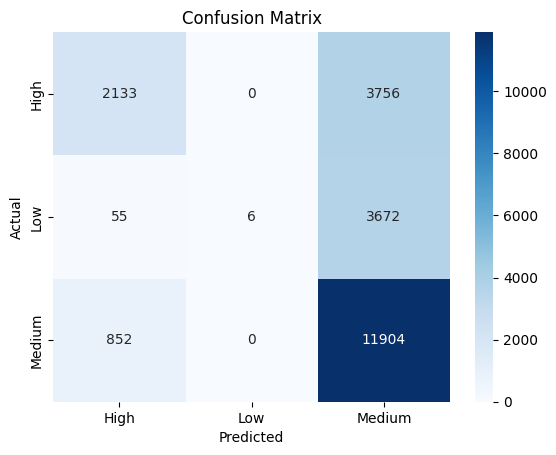

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label Encode categorical features
le_winery = LabelEncoder()
le_variety = LabelEncoder()
log_reg_df = combined_df.copy()
log_reg_df['winery_label'] = le_winery.fit_transform(log_reg_df['winery'])
log_reg_df['variety_label'] = le_variety.fit_transform(log_reg_df['variety'])
log_reg_df['points_category'] = pd.cut(data['points'], bins=[0, 85, 90, 100], labels=['Low', 'Medium', 'High'])

# Select features and target
X = log_reg_df[['winery_label', 'variety_label', 'price']]  # No one-hot encoding
y = log_reg_df['points_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()